<a href="https://colab.research.google.com/github/scskalicky/VocabAtVic2023NLPWorkshop/blob/main/03-NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Strings into Words**

- How can we get Python to turn a `string` into a set of words?
- the `str.split()` function is one way
- this function will "split" a string on a pre-defined character. The default is to split on whitespace:

In [103]:
# define a string and save it to a variable
pretzels = 'these pretzels are making me thirsty'

# use .split() to convert the string into a list of segments split on whitespace
pretzels.split()

['these', 'pretzels', 'are', 'making', 'me', 'thirsty']

The resulting object was a `list` of values, which happen to be individual words!

Do you remember `len()`? How can we use `len()` and `str.split()` to count the number of words in a string?

In [104]:
# how to use len() and .split() to count the total number of words?


## **Types, tokens, and TTR**

- types: unique words
- tokens: occurences of unique words
- type-token ratio (TTR): measure of lexical repetition in text

#### use `set()` to find unique instances of items in a sequence
- `set(tokens)` = all unique values

#### use `len()` and `set()` to calculate TTR

- `len(set(tokens))` / `len(tokens)`

In [105]:
# load in a text
turtles = """teenage mutant ninja turtles, 
            teenage mutant ninja turtles, 
            teenage mutant ninja turtles, 
            heroes in a halfshell, turtle power!"""

In [106]:
# convert to tokens using `.split()`
turtle_tokens = turtles.split()

In [107]:
# look at the tokens
turtle_tokens

['teenage',
 'mutant',
 'ninja',
 'turtles,',
 'teenage',
 'mutant',
 'ninja',
 'turtles,',
 'teenage',
 'mutant',
 'ninja',
 'turtles,',
 'heroes',
 'in',
 'a',
 'halfshell,',
 'turtle',
 'power!']

In [108]:
# use `len()` to count the number of words
len(turtle_tokens)

18

In [109]:
# use `set()` to get just the unique words
turtle_types = set(turtle_tokens)
turtle_types

{'a',
 'halfshell,',
 'heroes',
 'in',
 'mutant',
 'ninja',
 'power!',
 'teenage',
 'turtle',
 'turtles,'}

In [110]:
# use len() and set() to count the number of types..
len(turtle_types)

10

In [111]:
# finally...calculate the TTR!
len(turtle_types) / len(turtle_tokens)

0.5555555555555556

### Problems with `.split()`

- punctuation is retained
- not all languages use whitespace

In [112]:
yadda = 'yadda, yadda, yadda!'

set(yadda.split())

{'yadda!', 'yadda,'}

In [113]:
# not all languages use whitespace
zhongwen = '对不起我的中文不好'

zhongwen.split()

['对不起我的中文不好']

## **Tokenizing with NLTK**
- NLTK = [Natural Language ToolKit](https://www.nltk.org/book/)
- NLTK has a better method to tokenize words
- To use NLTK:
    - import the `nltk`` library
    - download some resources

Then use `nltk.word_tokenize()` to obtain tokens

In [114]:
# import the library and download required resources
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/sskalicky/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Compare `str.split()` and `nltk.word_tokenize()` on the same text

- NLTK function treats punctuation as a token
- does this create any new challenges for text metrics?

In [115]:
# .split() keeps punctuation attached to the word
split_yadda = yadda.split()

print(split_yadda)

['yadda,', 'yadda,', 'yadda!']


In [116]:
# nltk tokenizer recognises punctuation
nltk_yadda = nltk.word_tokenize(yadda)

print(nltk_yadda)

['yadda', ',', 'yadda', ',', 'yadda', '!']


In [117]:
# implications for contractions
nltk.word_tokenize('You know we\'re living in a society!')

['You', 'know', 'we', "'re", 'living', 'in', 'a', 'society', '!']

In [118]:
# Tokenize some text!


## **Word Frequency**

- the `nltk.FreqDist()` function quickly provides the frequency distribution of words in your text

In [119]:
# create a variable from our turtle text
turtles_fdist = nltk.FreqDist(nltk.word_tokenize(turtles))

In [120]:
# look at the whole thing
turtles_fdist

FreqDist({',': 4, 'teenage': 3, 'mutant': 3, 'ninja': 3, 'turtles': 3, 'heroes': 1, 'in': 1, 'a': 1, 'halfshell': 1, 'turtle': 1, ...})

In [121]:
# Top 3 most frequent words in this text?
turtles_fdist.most_common(3)

[(',', 4), ('teenage', 3), ('mutant', 3)]

In [122]:
# frequency of a specific word?
turtles_fdist['mutant']

3

In [123]:
# the ".hapaxes" shows you words with only occur once
turtles_fdist.hapaxes()

['heroes', 'in', 'a', 'halfshell', 'turtle', 'power', '!']

#### Frequency Distribution Functions

`fdist = nltk.FreqDist(tokens)`

Information|Syntax
-|-
Total number of words in the sample|`fdist.N()`
Frequency of any particular word|`fdist[word]`
Words which occur one time|`fdist.hapaxes()`
Top n most frequent words|`fdist.most_common(n)`
Plot the distributioon|`fdist.plot()`

### How about a more interesting text?

- let's load in a longer text, the short story [They're Made out of Meat](https://www.mit.edu/people/dpolicar/writing/prose/text/thinkingMeat.html)

- the cell below first downloads the text from GitHub
- then, the Python function `open()` is used to read in the text.

In [124]:
# Colab allows for terminal functions like `wget`
!wget 'https://raw.githubusercontent.com/scskalicky/VocabAtVic2023NLPWorkshop/main/tmoom.txt'
# open the file as a string into Python
tmoom = open('tmoom.txt').read()

--2023-12-10 18:53:35--  https://raw.githubusercontent.com/scskalicky/VocabAtVic2023NLPWorkshop/main/tmoom.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4450 (4.3K) [text/plain]
Saving to: ‘tmoom.txt.4’

tmoom.txt.4         100%[===================>]   4.35K  --.-KB/s    in 0s      

2023-12-10 18:53:35 (30.1 MB/s) - ‘tmoom.txt.4’ saved [4450/4450]



In [125]:
# look at the text
tmoom

'"They\'re made out of meat."\n"Meat?"\n"Meat. They\'re made out of meat."\n"Meat?"\n"There\'s no doubt about it. We picked several from different parts of the planet, took them aboard our recon vessels, probed them all the way through. They\'re completely meat."\n"That\'s impossible. What about the radio signals? The messages to the stars."\n"They use the radio waves to talk, but the signals don\'t come from them. The signals come from machines."\n"So who made the machines? That\'s who we want to contact."\n"They made the machines. That\'s what I\'m trying to tell you. Meat made the machines."\n"That\'s ridiculous. How can meat make a machine? You\'re asking me to believe in sentient meat."\n"I\'m not asking you, I\'m telling you. These creatures are the only sentient race in the sector and they\'re made out of meat."\n"Maybe they\'re like the Orfolei. You know, a carbon-based intelligence that goes through a meat stage."\n"Nope. They\'re born meat and they die meat. We studied them f

In [126]:
# maybe we should lowercase the text? easy as.
tmoom = tmoom.lower()
tmoom

'"they\'re made out of meat."\n"meat?"\n"meat. they\'re made out of meat."\n"meat?"\n"there\'s no doubt about it. we picked several from different parts of the planet, took them aboard our recon vessels, probed them all the way through. they\'re completely meat."\n"that\'s impossible. what about the radio signals? the messages to the stars."\n"they use the radio waves to talk, but the signals don\'t come from them. the signals come from machines."\n"so who made the machines? that\'s who we want to contact."\n"they made the machines. that\'s what i\'m trying to tell you. meat made the machines."\n"that\'s ridiculous. how can meat make a machine? you\'re asking me to believe in sentient meat."\n"i\'m not asking you, i\'m telling you. these creatures are the only sentient race in the sector and they\'re made out of meat."\n"maybe they\'re like the orfolei. you know, a carbon-based intelligence that goes through a meat stage."\n"nope. they\'re born meat and they die meat. we studied them f

In [127]:
# how many words?
len(tmoom.split())

778

In [128]:
# do you remember why the nltk method results in more 'words'?
len(nltk.word_tokenize(tmoom))

1082

In [129]:
# create frequency distribution using nltk tokenization method
tmoom_fdist = nltk.FreqDist(nltk.word_tokenize(tmoom))

In [ ]:
# what is the frequency of the word "meat" in TMOOM?


In [130]:
# what are the five most frequent words in TMOOM?


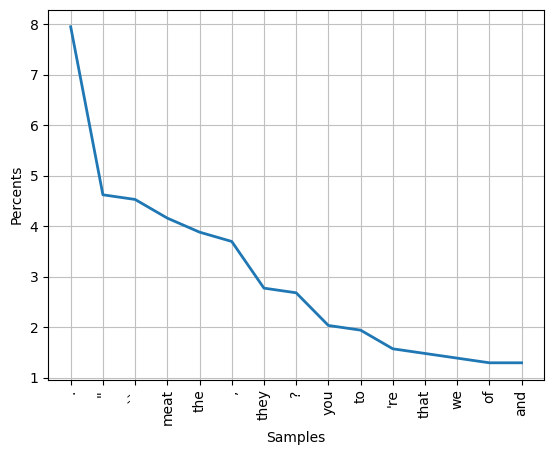

<Axes: xlabel='Samples', ylabel='Percents'>

In [81]:
# Plot the frequency of the top 15 most-frequent words
# percents = true for percents rather than raw count
tmoom_fdist.plot(15, percents = True)

### A bigger plot

We can expand the code to get a plot of top 50

- make the plot bigger
- rotate the x axis labels

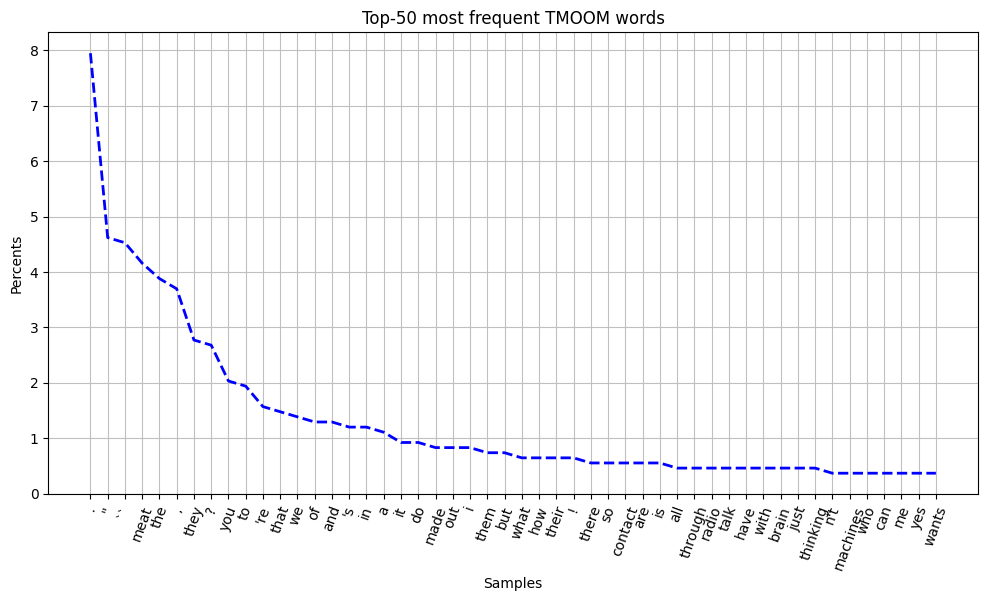

In [82]:
# these first two lines are to make the plot larger
import matplotlib.pyplot as plt
# resize the plot
plt.figure(figsize=(12, 6))

# this creates the plot
tmoom_fdist.plot(50, 
title = 'Top-50 most frequent TMOOM words', 
percents = True,
color = 'blue', 
#cumulative = True,
linestyle = 'dashed', show = False)

#this stuff just to rotate the xaxis labels
ax = plt.gca()
# Rotate the x-axis ticks
for tick in ax.get_xticklabels():
    tick.set_rotation(70)

# Show the plot
plt.show()

## **Pre-Processing**

- Use conditional expressions and tests to remove things we don't want
    - remove anything that is punctuation...
    - only keep things that are words...
    - only keep words of certain lengths...
    - remove function/stopwords


### Use `if` conditional statements to do this:

>```
>
>if condition is True:
>    do something
>
>```


#### Conditional tests include:

Test|Syntax
--|--
is `a` the same as `b`?| `a == b`
is `a` greater than `b`?|`a > b`
is `a` less than `b`?|`a < b`
is `a` in `b?`|`a in b`
is `a` not in `b?`|`a not in b`
string-specific tests|string-specific syntax
is `a` an alphanumeric character?|`a.isalpha()`
is `a` uppercased?|`a.isupper()`
is `a` lowercased?|`a.islower()`


In [31]:
# is 'a' equal to 'a'?
'a' == 'a'

True

In [32]:
# is 'a' equal to 'b'?
'a' == 'b'

False

#### `.isalpha()` is one way to remove punctuation...

In [84]:
'a'.isalpha()

True

In [85]:
'!'.isalpha()

False

Looping though a sequence allows you to perform the test for each item in the sequence:

Practice changing the condition to see different results.

Try:

- `letter.isupper()`
- `letter.islower()`
- `letter.isalpha()`

In [142]:
# sequence through the string
for letter in 'New Zealand!':
    # apply a test to each item in the string
    if ... :
        # perform an action is the test is True
        print(letter, end = '')

New Zealand!

### List Comprehensions

- Now that you understand looping and conditionals, time for list comprehensions 
- List comprehensions quickly create new lists from existing lists (or other sequences/generators)
- The general syntax of a list comprehension is as follows:

> `[statement/expression for value in sequence/generator]`

The list comprehension above uses `[]`, just like a list, and will indeed return a list of values which meet the statement or expression indicated in the *first* part of the list comprehension.

In [143]:
# ask for each letter in "word"
# note that the results are a list
[letter for letter in 'word']

['w', 'o', 'r', 'd']

In [144]:
# for each letter in "New Zealand", give me the letter if is upper case
[letter for letter in "New Zealand" if letter.isupper()]

['N', 'Z']

In [145]:
# for each token in the tokenized list created from "Hello World!", give me the token if it is alphanumeric
[token for token in nltk.word_tokenize("Hello World!") if token.isalpha()]

['Hello', 'World']

In [146]:
# for each token in the tokenized list created from "Hello World!", give me the token if it is alphanumeric
# also, lowercase the token
[token.lower() for token in nltk.word_tokenize("Hello World!") if token.isalpha()]

['hello', 'world']

So, how to obtain a list of all tokens from TMOOM that are *not* punctuation? 

- Can you complete the list comprehension?
- The first ??? should be a call to `nltk.word_tokenize(tmoom)`
- The second ??? should be a testing if `word` is alphanumeric. 

In [74]:
# for each word in the tokenized version of TMOOM, give me the token if it is alphanumeric
tmoom_no_punc = [word for word in ??? if ???]

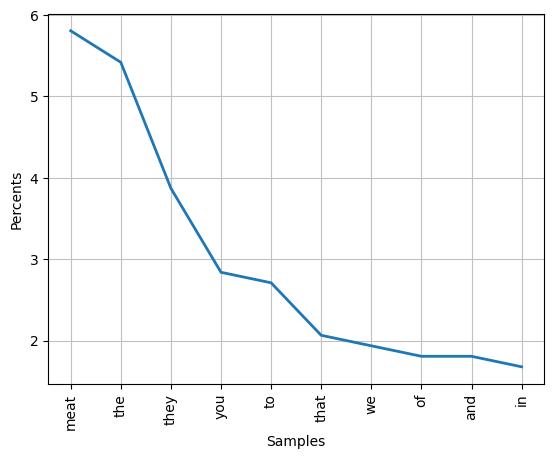

<Axes: xlabel='Samples', ylabel='Percents'>

In [76]:
# we can plot this frequency - no more punctuation :) 
nltk.FreqDist(tmoom_no_punc).plot(10, percents = True)

Removing stopwords

You might also be only interested in removing all of the function words in a text. 

You can do so by defining a list of words you *don't* want, and asking for a list of all words but those. 

And, NLTK has a built-in list of stopwords!

In [147]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sskalicky/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [148]:
# save the stopwords to an list
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
# view the stopwords
stopwords

In [159]:
# give me the lower cased version of all tokens in the tokenized version of the text
tmoom_fdist_no_stopwords = nltk.FreqDist([token.lower() for token in nltk.word_tokenize(tmoom) 
# if the lowercased version of the text is NOT in stopwords
if token.lower() not in stopwords 
# and if the token is alphanumeric
and token.isalpha()])

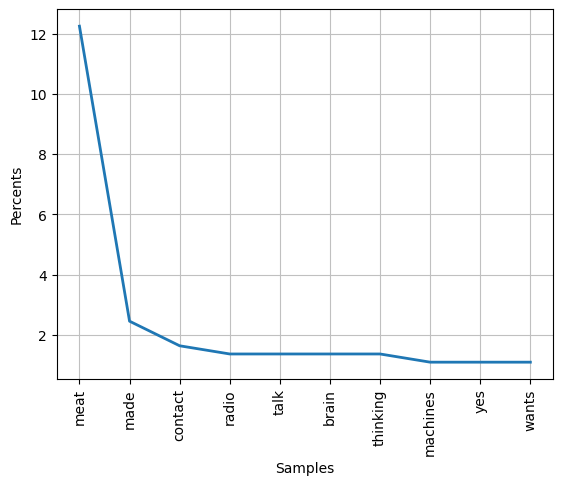

<Axes: xlabel='Samples', ylabel='Percents'>

In [161]:
# the plot looks much different now!
tmoom_fdist_no_stopwords.plot(10, percents = True)

## **Parts of Speech**

NLTK can also be used to tag the part of speech for words in your document. 


We can use the built in NLTK part of speech tagging function.

The function expects tokens:

> `nltk.pos_tag(tokens)`

The results will be a list of `(word,tag)` pairs (which incidently introduces you to another Python data structure, the tuple.)


In [163]:
# step 1: have some text
gc_quote = "You know, we're living in a society! We're supposed to act in a civilized way."

In [164]:
# step 2: tokenize
gc_quote_tokens = nltk.word_tokenize(gc_quote)

In [ ]:
# step 3: tag
gc_quote_pos = nltk.pos_tag(gc_quote_tokens)

# look at the resulting (word, tag) pairs
[tagged for tagged in gc_quote_pos]

In [ ]:
# full list of tags, with definitions and examples
nltk.help.upenn_tagset()

# **Frequency + Part of Speech**

If you've followed along so far, time for a bit more of an information dump.

Let's combine everything so far to find the frequency of various words *and* their part of speech

In [170]:
# use the tmoom text
tmoom[:25]

'"they\'re made out of meat'

In [174]:
# tokenize
tmoom_tokens = nltk.word_tokenize(tmoom)

In [191]:
tmoom_pos = nltk.pos_tag(tmoom_tokens)

In [192]:
tmoom_pos[:10]

[('``', '``'),
 ('they', 'PRP'),
 ("'re", 'VBP'),
 ('made', 'VBN'),
 ('out', 'IN'),
 ('of', 'IN'),
 ('meat', 'NN'),
 ('.', '.'),
 ("''", "''"),
 ('``', '``')]

### Slicing

We need a way to access the first or second thing in these data

We can do so with slicing/indexing

In [199]:
slicing_example = ['one', 'two', 'three']

In [200]:
# the first thing is access with [0]
slicing_example[0]


'one'

In [201]:
# the second with [1]...
slicing_example[1]

'two'

In [202]:
# and so on...
slicing_example[2]

'three'

The pos tags are pairs like 

`(word, tag)`

So use [0] to get the word, and [1] to get the tag.

### Try it out on the TMOOM text.

- clean punctuation from the tagged text
- create a frequency distribution

In [203]:
# another (better) way to clean punctuation
punctuation = "'?.,[];:'`"
quotes = ['``', "''"]

# the [0] is a slice which says index the first thing in the list
tmoom_clean = [pair for pair in tmoom_pos if pair[0] not in punctuation and pair[0] not in quotes]

In [198]:
tmoom_clean[:10]

[('they', 'PRP'),
 ("'re", 'VBP'),
 ('made', 'VBN'),
 ('out', 'IN'),
 ('of', 'IN'),
 ('meat', 'NN'),
 ('meat', 'NN'),
 ('meat', 'NN'),
 ('they', 'PRP'),
 ("'re", 'VBP')]

In [206]:
tmoom_combined_fdist = nltk.FreqDist(tmoom_clean)

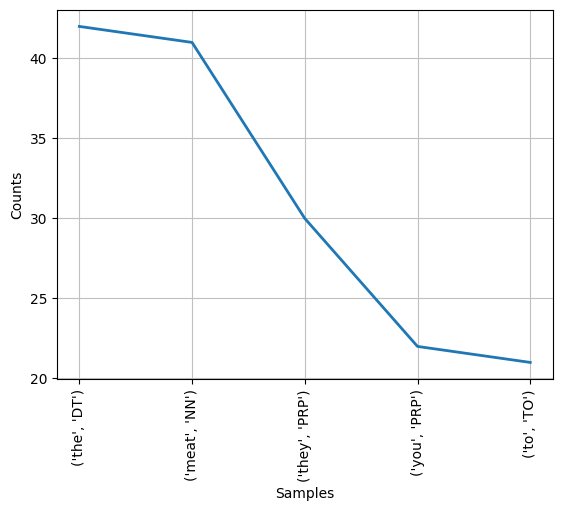

<Axes: xlabel='Samples', ylabel='Counts'>

In [208]:
tmoom_combined_fdist.plot(5)

In [209]:
tmoom_pos_fdist = nltk.FreqDist([pair[1] for pair in tmoom_clean])

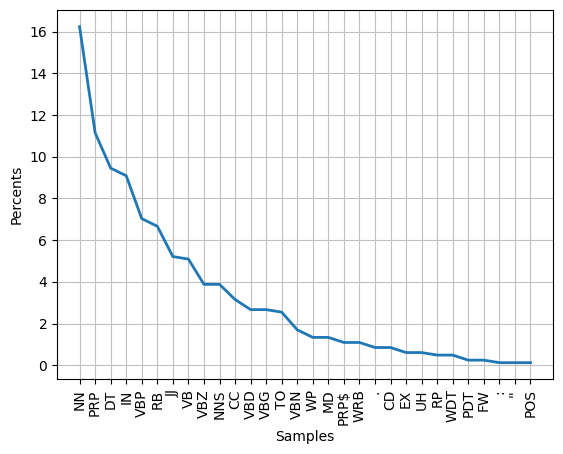

<Axes: xlabel='Samples', ylabel='Percents'>

In [213]:
tmoom_pos_fdist.plot(percents = True)